<a href="https://colab.research.google.com/github/el-thobhy/rainfall-prediction/blob/master/test_code_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

In [127]:
import pandas as pd
import seaborn as sns

### Data Loading

In [128]:
data_baru = pd.read_excel('2022 Feb 2023 perjam.xlsx')
data_baru

,Date and Time,Air Tmp (C) M 60 Min,Mag WD 60 Min (deg) M,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,True WD 60 Min (deg) M,WS 60 Min (kt) M,klasifikasi
0,1/12/2022 0:00,23.73,82.0,29.7,1009.01,100.0,84.0,2.0,rain
1,1/12/2022 1:00,26.51,61.0,29.5,1009.35,92.9,63.0,2.0,rain
2,1/12/2022 2:00,28.45,3.0,23.5,1009.47,81.8,5.0,2.0,rain
3,1/12/2022 3:00,29.59,340.0,21.9,1009.11,75.2,342.0,2.0,rain
4,1/12/2022 4:00,30.68,297.0,19.9,1008.14,69.8,299.0,4.0,rain
...,...,...,...,...,...,...,...,...,...
2035,23/02/2023 19:00:00,25.00,269.0,NaN,1008.60,90.0,271.0,2.0,no rain
2036,23/02/2023 20:00:00,24.70,301.0,NaN,1008.37,92.2,303.0,2.0,no rain
2037,23/02/2023 21:00:00,24.31,312.0,NaN,1008.40,92.9,314.0,2.0,no rain
2038,23/02/2023 22:00:00,24.43,334.0,NaN,1008.74,92.0,336.0,4.0,no rain


### Explanatory Data Analysis

_*Variable description*_

- Date and Time = Date and Time
- Air Tmp (C) M 60 Min
- Mag WD 60 Min (deg) M
- Precip 1Hr (mm) M
- QNH (hPa) M
- RH (%) M 60 Min
- True WD 60 Min (deg) M
- WS 60 Min (kt) M
- klasifikasi

In [129]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date and Time           2040 non-null   object 
 1   Air Tmp (C) M 60 Min    1905 non-null   float64
 2   Mag WD 60 Min (deg) M   1906 non-null   float64
 3   Precip 1Hr (mm) M       1918 non-null   float64
 4   QNH (hPa) M             1917 non-null   float64
 5   RH (%) M 60 Min         1906 non-null   float64
 6   True WD 60 Min (deg) M  1906 non-null   float64
 7   WS 60 Min (kt) M        1906 non-null   float64
 8   klasifikasi             2040 non-null   object 
dtypes: float64(7), object(2)
memory usage: 143.6+ KB


In [130]:
data_baru.sort_values(by=['Date and Time'], inplace=True, ascending=True)
data_baru.set_index('Date and Time', inplace= True)

#### Missing value

In [131]:
data_baru.describe()

,Air Tmp (C) M 60 Min,Mag WD 60 Min (deg) M,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,True WD 60 Min (deg) M,WS 60 Min (kt) M
count,1905.000000,1906.000000,1918.000000,1917.000000,1906.000000,1906.000000,1906.000000
mean,26.352551,204.625918,0.273045,1009.294476,84.791501,203.342078,3.754460
std,2.817952,118.346611,1.829971,2.000466,13.232921,118.879535,2.439298
min,21.920000,2.000000,0.000000,1002.980000,43.300000,1.000000,0.000000
25%,24.100000,78.000000,0.000000,1008.000000,74.925000,78.000000,2.000000
50%,25.400000,247.500000,0.000000,1009.350000,89.400000,245.000000,3.000000
75%,28.640000,305.750000,0.000000,1010.670000,96.000000,305.000000,5.000000
max,33.710000,360.000000,29.700000,1014.260000,100.000000,360.000000,13.000000


_ada lebih dari 100 data yang hilang, total data adalah 2039, dan yang terhitung 1900_

In [132]:
data_baru.isnull().sum()

Air Tmp (C) M 60 Min      135
Mag WD 60 Min (deg) M     134
Precip 1Hr (mm) M         122
QNH (hPa) M               123
RH (%) M 60 Min           134
True WD 60 Min (deg) M    134
WS 60 Min (kt) M          134
klasifikasi                 0
dtype: int64

In [133]:
data_hilang = data_baru.isnull().sum()
data_hilang = pd.DataFrame(data_hilang)
writer = pd.ExcelWriter('data_hil.xlsx')
data_hilang.to_excel(writer)
writer.save()

In [134]:
data_baru = data_baru.dropna(how='any',axis=0) 
data_baru.count()

Air Tmp (C) M 60 Min      1783
Mag WD 60 Min (deg) M     1783
Precip 1Hr (mm) M         1783
QNH (hPa) M               1783
RH (%) M 60 Min           1783
True WD 60 Min (deg) M    1783
WS 60 Min (kt) M          1783
klasifikasi               1783
dtype: int64

In [135]:
data_baru.isnull().sum()

Air Tmp (C) M 60 Min      0
Mag WD 60 Min (deg) M     0
Precip 1Hr (mm) M         0
QNH (hPa) M               0
RH (%) M 60 Min           0
True WD 60 Min (deg) M    0
WS 60 Min (kt) M          0
klasifikasi               0
dtype: int64

In [136]:
data_baru = data_baru.drop(data_baru.columns[[1,5]], axis=1)

#### Pesebaran data

dilihat dengan histogram

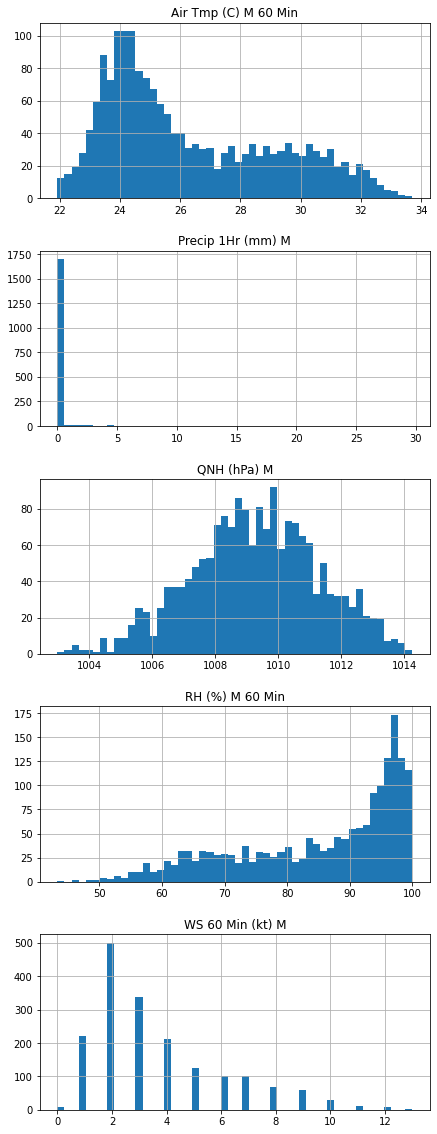

In [137]:
import matplotlib.pyplot as plt

data_baru.hist(bins=50, figsize=(7,20), layout=(5,1))
plt.show()

#### Matriks korelasi

<AxesSubplot:>

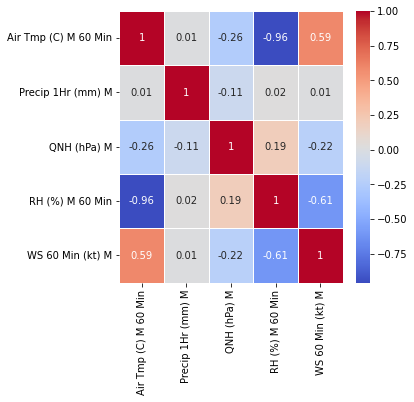

In [138]:
plt.figure(figsize=(5, 5))
correlation_matrix = data_baru.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )

In [139]:
# Get the correlation coefficients for "rain_sum" feature
rain_corr = data_baru.corr()['Precip 1Hr (mm) M'].sort_values(ascending=False)
rain_corr

Precip 1Hr (mm) M       1.000000
RH (%) M 60 Min         0.021026
Air Tmp (C) M 60 Min    0.009483
WS 60 Min (kt) M        0.005413
QNH (hPa) M            -0.112277
Name: Precip 1Hr (mm) M, dtype: float64

### Data preparation

#### one-hot encoding

mengubah data kategori dengan one-hot encoding

In [140]:
data_baru = pd.get_dummies(data_baru)
data_baru

,Air Tmp (C) M 60 Min,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,WS 60 Min (kt) M,klasifikasi_no rain,klasifikasi_rain
Date and Time,,,,,,,
1/1/2023 0:00,23.16,0.0,1012.80,91.8,3.0,1,0
1/1/2023 10:00,28.85,0.0,1009.10,72.0,13.0,1,0
1/1/2023 11:00,27.30,0.0,1009.94,77.6,9.0,1,0
1/1/2023 12:00,26.37,0.0,1011.04,82.0,6.0,1,0
1/1/2023 13:00,25.82,0.0,1012.15,84.6,4.0,1,0
...,...,...,...,...,...,...,...
9/2/2023 5:00,31.46,0.0,1008.42,61.6,6.0,1,0
9/2/2023 6:00,32.10,0.0,1007.59,58.3,7.0,1,0
9/2/2023 7:00,32.02,0.0,1006.90,59.0,8.0,1,0


In [141]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 1/1/2023 0:00 to 9/2/2023 9:00
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Tmp (C) M 60 Min  1783 non-null   float64
 1   Precip 1Hr (mm) M     1783 non-null   float64
 2   QNH (hPa) M           1783 non-null   float64
 3   RH (%) M 60 Min       1783 non-null   float64
 4   WS 60 Min (kt) M      1783 non-null   float64
 5   klasifikasi_no rain   1783 non-null   uint8  
 6   klasifikasi_rain      1783 non-null   uint8  
dtypes: float64(5), uint8(2)
memory usage: 87.1+ KB


Membagi data train dataset

In [142]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 1/1/2023 0:00 to 9/2/2023 9:00
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Tmp (C) M 60 Min  1783 non-null   float64
 1   Precip 1Hr (mm) M     1783 non-null   float64
 2   QNH (hPa) M           1783 non-null   float64
 3   RH (%) M 60 Min       1783 non-null   float64
 4   WS 60 Min (kt) M      1783 non-null   float64
 5   klasifikasi_no rain   1783 non-null   uint8  
 6   klasifikasi_rain      1783 non-null   uint8  
dtypes: float64(5), uint8(2)
memory usage: 87.1+ KB


pertama untuk data fitur hapus kolom precip, dan klasifikasi

In [143]:
from sklearn import preprocessing

df_new = data_baru
X = df_new.drop(df_new.columns[[1,5,6]], axis=1)

In [144]:
y = df_new[['klasifikasi_rain','klasifikasi_no rain']]

In [145]:
from sklearn.model_selection import train_test_split
#40 best random state
#32 better random state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.90, test_size = 0.10, random_state=200)

In [146]:
data_split = {
    'Data latih': X_train.count(),
    'Data uji': X_test.count(),
    }
split = pd.DataFrame(data_split)
writer = pd.ExcelWriter('data/data_split.xlsx')
split.to_excel(writer)
writer.save()

In [147]:
data_split_target = {
    'Data latih': y_train.count(),
    'Data uji': y_test.count(),
    }
split = pd.DataFrame(data_split_target)
writer = pd.ExcelWriter('data/data_split_target.xlsx')
split.to_excel(writer)
writer.save()

In [148]:
pd.DataFrame(y_train)

,klasifikasi_rain,klasifikasi_no rain
Date and Time,,
26/12/2022 22:00:00,0,1
23/01/2023 05:00:00,0,1
13/01/2023 09:00:00,0,1
16/12/2022 07:00:00,0,1
28/01/2023 13:00:00,0,1
...,...,...
20/12/2022 00:00:00,0,1
8/2/2023 2:00,0,1
2/2/2023 22:00,0,1


## Model Development

In [149]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve
import plotly.express as px
import plotly.graph_objs as go


##### Tampa tuning

In [150]:
xgb = XGBClassifier(
    max_depth=6, 
    n_estimators=100, 
    learning_rate=0.3, 
    random_state=0)
xgb.fit(X_train, y_train)

pred_no_tuning = xgb.predict(X_test)

In [151]:
print(classification_report(y_test,pred_no_tuning))

              precision    recall  f1-score   support

           0       0.33      0.25      0.29         8
           1       0.97      0.98      0.97       171

   micro avg       0.94      0.94      0.94       179
   macro avg       0.65      0.61      0.63       179
weighted avg       0.94      0.94      0.94       179
 samples avg       0.94      0.94      0.94       179



[[  2   6]
 [  4 167]]


<AxesSubplot:>

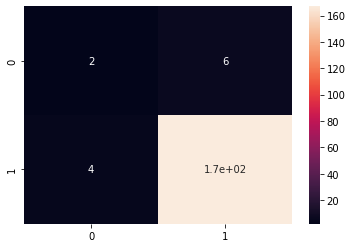

In [152]:
cm = confusion_matrix(
    y_test.values.argmax(axis=1), pred_no_tuning.argmax(axis=1))
print(cm)
sns.heatmap(cm, annot=True)

In [153]:
# # calculate the accuracy, precision, recall, and F1-score of the model
# accuracy = accuracy_score(y_test, pred_no_tuning)
# precision = precision_score(y_test, pred_no_tuning, average='micro')
# recall = recall_score(y_test, pred_no_tuning, average='micro')
# f1 = f1_score(y_test, pred_no_tuning, average='micro')

tn, fp, fn, tp = confusion_matrix(y_test.values.argmax(axis=1), pred_no_tuning.argmax(axis=1)).ravel()

# Menghitung specificity score
accuracy = (tp + tn) / (tp + fp+ tn + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*((precision*recall)/(precision+recall))
specificity = tn / (tn + fp)

# calculate the ROC-AUC score of the model
roc_auc = roc_auc_score(y_test, pred_no_tuning)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Sensitivity score: {specificity:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")

Accuracy: 0.94
Precision: 0.97
Recall: 0.98
F1-score: 0.97
Sensitivity score: 0.25
ROC-AUC score: 0.61


##### Dengan Tuning

mendefenisikan hyperparameter

In [154]:
from scipy.stats import uniform, randint
import numpy as np
params = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': uniform(0.01, 1)
}
params

{'n_estimators': [100],
 'max_depth': [6],
 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x13583b96a10>}

Tuning dengan RSCV

In [155]:
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=0)
# Perform random search
search = RandomizedSearchCV(
    xgb_model, param_distributions=params, 
    n_iter=50, 
    cv=10,
    scoring='roc_auc', 
    n_jobs=-1,
    verbose=3
    )
search.fit(X_train, y_train)
print("Best hyperparameters: ", search.best_params_)
print("AUC_ROC", search.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters:  {'learning_rate': 0.2000644268488342, 'max_depth': 6, 'n_estimators': 100}
AUC_ROC 0.7823086236731345


In [156]:
#fine search
best_params = search.best_params_
param_dist = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': np.logspace(np.log10(best_params['learning_rate']-0.01), np.log10(best_params['learning_rate']+0.1), 50),
}

fine_search = GridSearchCV(
    xgb_model, param_grid=param_dist, 
    cv=10, 
    scoring='roc_auc', 
    n_jobs=-1,
    verbose=True
    )
fine_search.fit(X_train, y_train)


print("Best hyperparameters: ", fine_search.best_params_)
print("AUC_ROC", fine_search.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters:  {'learning_rate': 0.2066930150779273, 'max_depth': 6, 'n_estimators': 100}
AUC_ROC 0.7833770082357613


Hasil tuning

### Model Evaluation

#### confussion matrix

In [157]:
# Train and evaluate the model with best hyperparameters on the validation set
y_pred = fine_search.best_estimator_.predict(X_test)

[[  2   6]
 [  2 169]]


<AxesSubplot:>

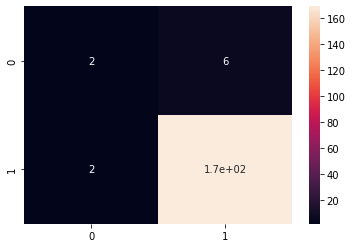

In [158]:
cm = confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
sns.heatmap(cm, annot=True)

In [169]:
# calculate the accuracy, precision, recall, and F1-score of the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='micro')
# recall = recall_score(y_test, y_pred, average='micro')
# f1 = f1_score(y_test, y_pred, average='micro')
# Menghitung confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)).ravel()

# Menghitung specificity score
accuracy = (tp + tn) / (tp + fp+ tn + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2*((precision*recall)/(precision+recall))
specificity = tn / (tn + fp)


# calculate the ROC-AUC score of the model
roc_auc = roc_auc_score(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"Specificity-score: {specificity:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")

Accuracy: 0.96
Precision: 0.97
Recall: 0.99
F1-score: 0.98
Specificity-score: 0.25
ROC-AUC score: 0.62


In [160]:
data_baru['kategori'] = data_baru.apply(lambda x: 'rain' if x['klasifikasi_rain'] == 1 else ('rain'), axis=1)
data_baru

,Air Tmp (C) M 60 Min,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,WS 60 Min (kt) M,klasifikasi_no rain,klasifikasi_rain,kategori
Date and Time,,,,,,,,
1/1/2023 0:00,23.16,0.0,1012.80,91.8,3.0,1,0,rain
1/1/2023 10:00,28.85,0.0,1009.10,72.0,13.0,1,0,rain
1/1/2023 11:00,27.30,0.0,1009.94,77.6,9.0,1,0,rain
1/1/2023 12:00,26.37,0.0,1011.04,82.0,6.0,1,0,rain
1/1/2023 13:00,25.82,0.0,1012.15,84.6,4.0,1,0,rain
...,...,...,...,...,...,...,...,...
9/2/2023 5:00,31.46,0.0,1008.42,61.6,6.0,1,0,rain
9/2/2023 6:00,32.10,0.0,1007.59,58.3,7.0,1,0,rain
9/2/2023 7:00,32.02,0.0,1006.90,59.0,8.0,1,0,rain


Kurva ROC AUC

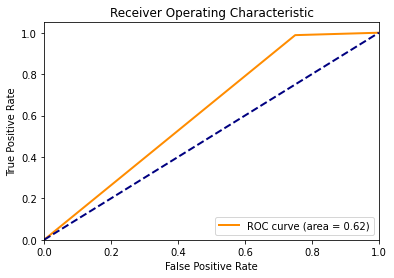

In [161]:
fpr, tpr, thresholds = roc_curve( y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [162]:
fpr, tpr, thresholds = roc_curve(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
roc_auc = auc(fpr, tpr)

data = np.column_stack((fpr, tpr))

fig = px.line(x=data[:,0], y=data[:,1], title='ROC Curve (AUC = {:.3f})'.format(roc_auc),
              labels=dict(x='False Positive Rate', y='True Positive Rate'),
              range_x=[0,1], range_y=[0,1])
fig.add_shape(type='line', line=dict(dash='dash'), x0=0, y0=0, x1=1, y1=1)
fig.show()

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.97      0.99      0.98       171

   micro avg       0.96      0.96      0.96       179
   macro avg       0.73      0.62      0.66       179
weighted avg       0.94      0.96      0.95       179
 samples avg       0.96      0.96      0.96       179



#### Visualisasi Tuning

In [164]:
result_coarse = search.cv_results_
result_fine = fine_search.cv_results_

In [165]:
params_key = [f"param_{p}" for p in params.keys()]
params_key.append('AUC_ROC')

In [166]:
AUC = []
for mean_score in result_coarse["mean_test_score"]:
    AUC.append(mean_score)
aoc_roc = {}
aoc_roc['AUC_ROC'] = AUC
result_coarse['AUC_ROC'] = AUC

In [167]:
AUC_Fine = []
for mean_score in result_fine["mean_test_score"]:
    AUC_Fine.append(mean_score)
aoc_roc_fine = {}
aoc_roc_fine['AUC_ROC'] = AUC_Fine
result_fine['AUC_ROC'] = AUC_Fine

In [168]:
# create a dataframe from results
fig = px.scatter(result_coarse, x = params_key[2], 
                    y = params_key[3])
fig.update_traces(marker=dict(color='red'))
fig.add_trace(px.scatter(result_fine, x = params_key[2], 
                    y = params_key[3]).data[0])

# menyatukan kedua plot dalam satu objek

fig.show()
